# Model Notebook

This is the notebook for model in age gender detector. Here, we will extract the data ,train it and fit it into our model, and will evaluate our results and optimize the model for better results.

## Import the Necessary Libraries

In [36]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop


## Extract data from the dataser

If data has not been downloaded yet, download it from [Here](https://www.kaggle.com/jangedoo/utkface-new)

In [37]:
fldr="./UTKFace"

In [38]:
import os
flies=os.listdir(fldr)

## Create List of images from the dataset

In [39]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)


./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

## Create List of Age and Gender from the dataset

In [40]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

## Viewing a sample

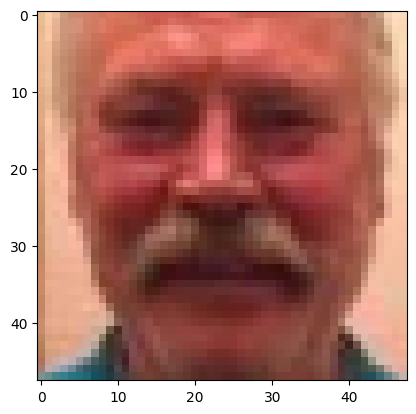

In [41]:
plt.imshow(images[87])

In [42]:
print(ages[87])

55


In [43]:
print(genders[87])

0


## Saving images array,ages array, and genders array in the system

In [44]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [45]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

## Finding the no. of Male and Female samples respectively

In [46]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[2572 1916]


## Plotting the No. of Male and Female Samples

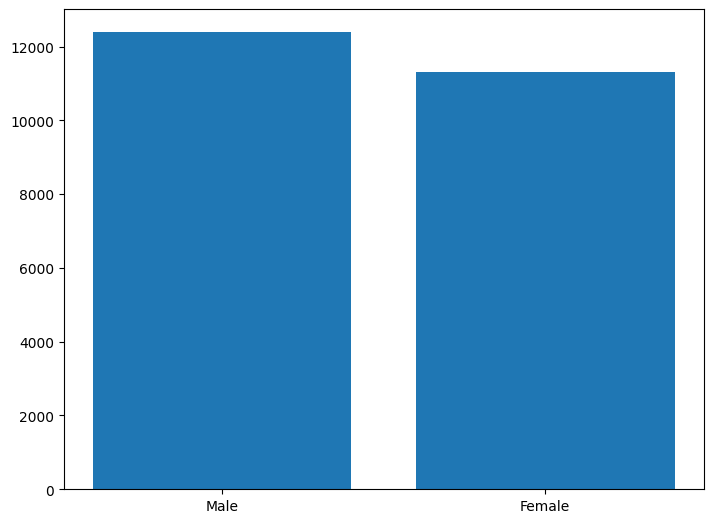

In [47]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

## Finding The no. of samples in each age

In [48]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[196 131 139 263 166  24 206 236  97 271  82 293 161 125 103  50 259  77
  94 100  56 147  33  98  63  32 148  58  28  69  23 133  22  40  18  24
 155  35  10  34  33  82   2  13   5   9  17   9  11   2   1   5]


## Converting Age counts to lists

In [49]:
val=values.tolist()
cnt=counts.tolist()

## Plotting The Samples Agewise

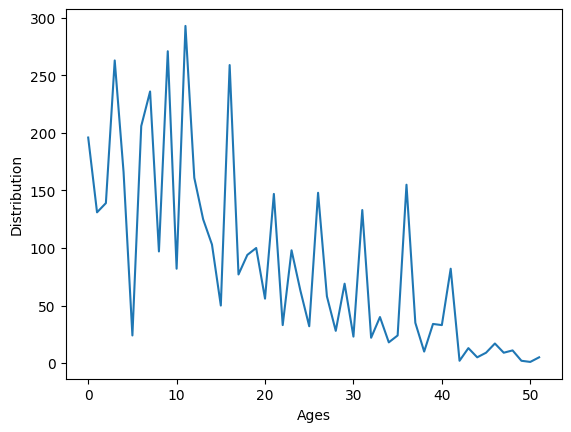

In [50]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

## Definig Labes for Output

In [51]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

## Creating another list of images from existing one
### For better learning

In [60]:
images_f_2=images_f/255

In [61]:
images_f_2.shape

(4488, 48, 48, 3)

In [62]:
labels_f=np.array(labels)

## Splitting The Dataset into test and train

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [65]:
Y_train[0:5]

array([[66,  0],
       [59,  0],
       [80,  1],
       [85,  1],
       [80,  1]])

## Splitting 'Y_test' and 'Y_train' further
### For better understanding  

In [66]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [67]:
Y_train_2[0][0:5]

array([0, 0, 1, 1, 1])

In [68]:
Y_train_2[1][0:5]

array([66, 59, 80, 85, 80])

## Defining the Model

In [69]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x


In [70]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy","Precision"])
    return model

In [71]:
Model=model((48,48,3))

In [72]:
Model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 48, 48,    │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 48, 48,    │          0 │ conv2d_8[0][0]    │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 48, 48,    │          0 │ dropout_12[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 24, 24,    │          0 │ activation_8[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 24, 24,    │          0 │ conv2d_9[0][0]    │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 24, 24,    │          0 │ dropout_13[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 12, 12,    │          0 │ activation_9[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 12, 12,    │     73,856 │ max_pooling2d_9[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 12, 12,    │          0 │ conv2d_10[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 12, 12,    │          0 │ dropout_14[0][0]  │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 6, 6, 128) │          0 │ activation_10[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_10… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 6, 6, 256) │          0 │ conv2d_11[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 6, 6, 256) │          0 │ dropout_15[0][0]  │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 3, 3, 256) │          0 │ activation_11[0]… │
│ (MaxPooling2D)      │                   │            │                 

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
from tensorflow.keras.callbacks import ModelCheckpoint

## Initializing the Model

In [74]:
checkpoint=ModelCheckpoint('age_gender_detector.keras',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running the Model
### This will take some time 

In [75]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - age_out_Precision: 0.9811 - loss: 36.8363 - sex_out_accuracy: 0.5381
Epoch 1: val_loss improved from inf to 25.59760, saving model to age_gender_detector.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - age_out_Precision: 0.9815 - loss: 36.6914 - sex_out_accuracy: 0.5383 - val_age_out_Precision: 1.0000 - val_loss: 25.5976 - val_sex_out_accuracy: 0.5829
Epoch 2/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - age_out_Precision: 1.0000 - loss: 24.5430 - sex_out_accuracy: 0.5766
Epoch 2: val_loss did not improve from 25.59760
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - age_out_Precision: 1.0000 - loss: 24.5214 - sex_out_accuracy: 0.5765 - val_age_out_Precision: 1.0000 - val_loss: 30.8601 - val_sex_out_accuracy: 0.5829
Epoch 3/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - age_out_Precision: 1.0000 - loss: 22.7042 - sex_out_accuracy: 0.5753
Epoch 3: val_loss did not improve from 25.59760
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - age_o

## Model Evaluation

In [76]:
Model.evaluate(X_test,Y_test_2)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - age_out_Precision: 1.0000 - loss: 9.7536 - sex_out_accuracy: 0.8614


[10.071301460266113, 1.0, 0.8627451062202454]

In [77]:
pred=Model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step


In [78]:
pred[1]

array([[48.47592  ],
       [ 7.8530855],
       [62.38778  ],
       ...,
       [56.88397  ],
       [55.1776   ],
       [61.81477  ]], dtype=float32)

## Plotting Loss

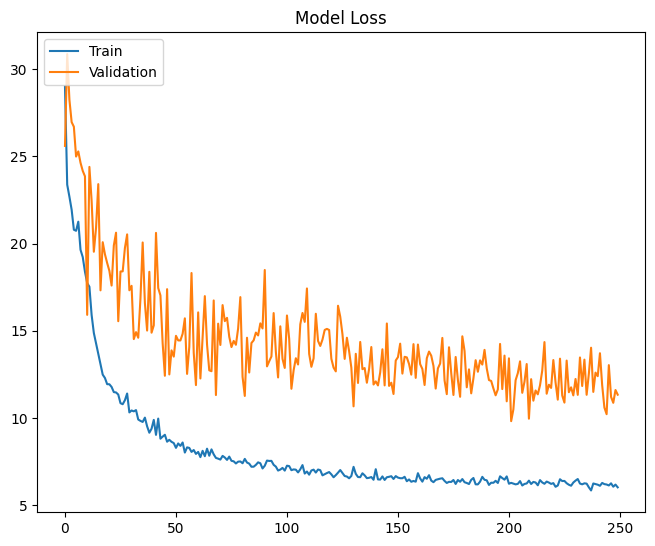

In [79]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


## Plotting Sex Accuracy

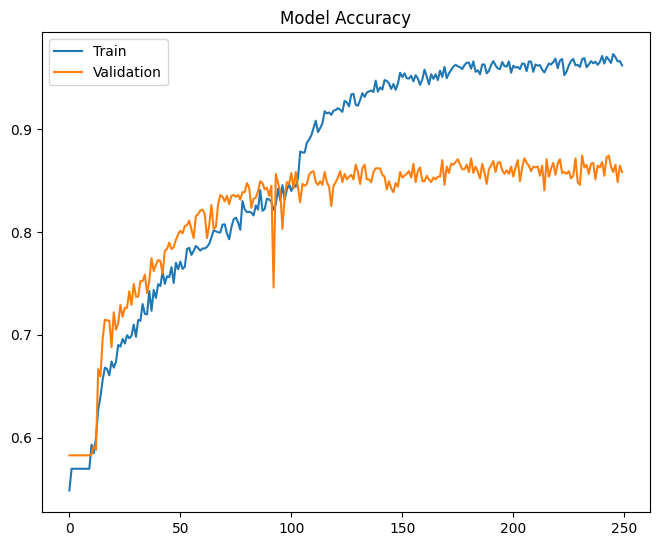

In [80]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Gender Accuracy

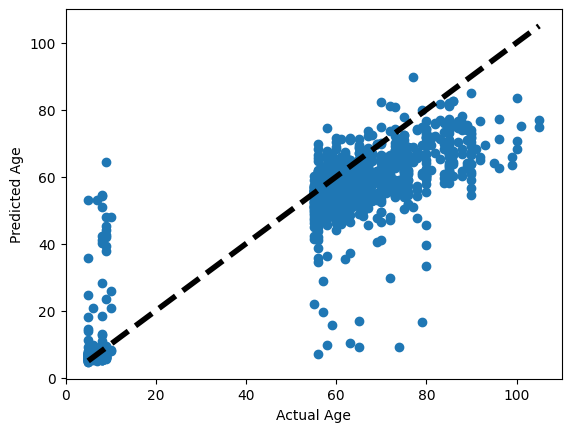

In [81]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

## Making Report of the Model (Gender Only)

In [82]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1
    

C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\2690061568.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [84]:
report=classification_report(Y_test_2[0],Pred_l)

In [85]:
print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       654
           1       0.88      0.78      0.83       468

    accuracy                           0.86      1122
   macro avg       0.87      0.85      0.86      1122
weighted avg       0.86      0.86      0.86      1122



## Making Heatmap of the Model (Gender only)

In [86]:
results=confusion_matrix(Y_test_2[0],Pred_l)

In [89]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------- ----------------- 163.8/294.9 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00


<Axes: >

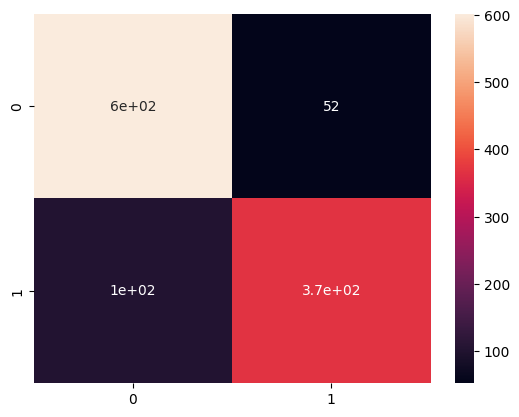

In [90]:
import seaborn as sns
sns.heatmap(results,annot=True)

## Testing The Images Ourself

In [91]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])
    

### Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted Age is 84
Predicted Gender is Female


C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


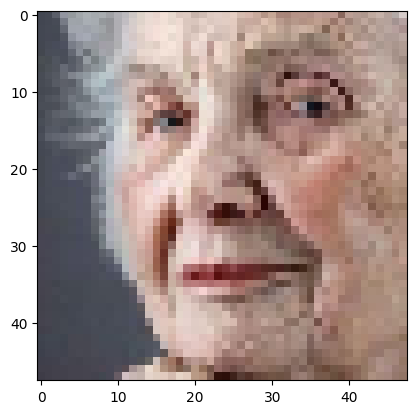

In [92]:
test_image(4,images_f,images_f_2,Model)

### Test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Age is 8
Predicted Gender is Male


C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


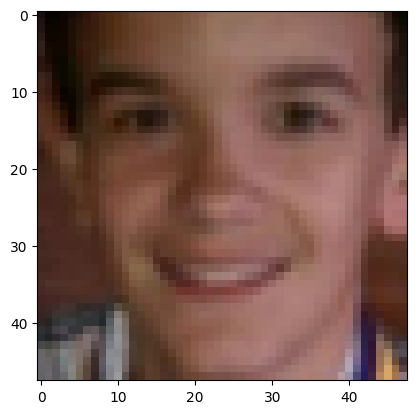

In [93]:
test_image(23,images_f,images_f_2,Model)

### Testt 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted Age is 51
Predicted Gender is Male


C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


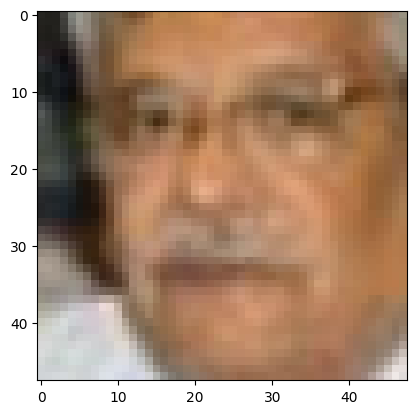

In [94]:
test_image(168,images_f,images_f_2,Model)

### Test 4
Error in age in this case

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted Age is 49
Predicted Gender is Male


C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


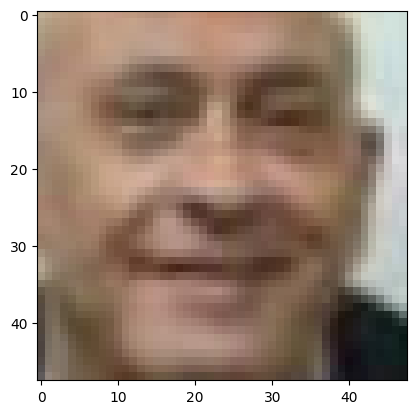

In [95]:
test_image(888,images_f,images_f_2,Model)

### Test 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Predicted Age is 53
Predicted Gender is Male


C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\1423547029.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\Mounika Thouda\AppData\Local\Temp\ipykernel_20700\1423547029.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


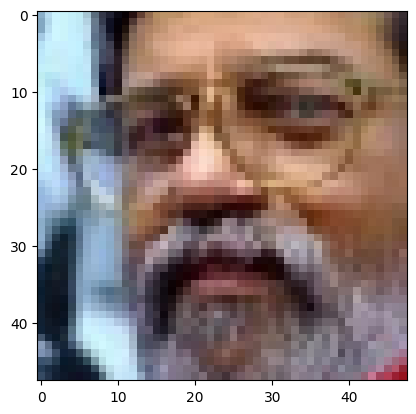

In [98]:
test_image(1288,images_f,images_f_2,Model)